In [1]:
import cv2
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import tensorflow as tf
import numpy as np
import segmentation_models as sm
from matplotlib import pyplot as plt

Segmentation Models: using `tf.keras` framework.


In [2]:
imagepath = 'crosval/train/AAE_0173.png'

In [3]:
model = tf.keras.models.load_model('bestmodel.h5',compile=False)

In [4]:
model.compile('Adam', loss=sm.losses.binary_focal_dice_loss, metrics=[sm.metrics.iou_score])

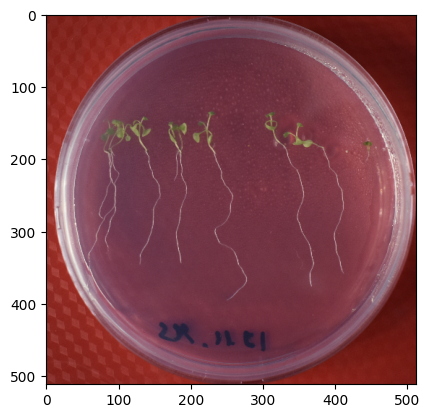

In [5]:
image = cv2.imread(imagepath,cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(512,512))
plt.imshow(image)

In [6]:
image = np.array(image)

In [7]:
mask  = model(image.reshape(1,512,512,3)/255)

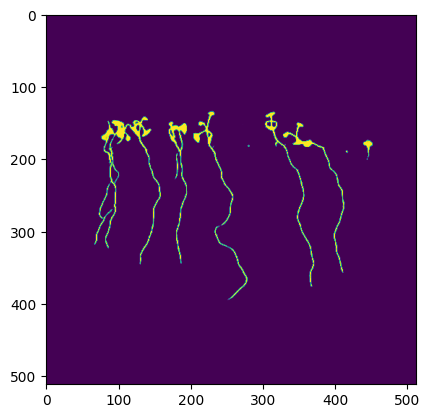

In [8]:
plt.imshow(mask[0])

In [9]:
type(mask)

tensorflow.python.framework.ops.EagerTensor

In [10]:
plt.imsave('test.png',tf.keras.utils.array_to_img(mask[0]))

In [11]:
mask = cv2.imread('test.png',cv2.IMREAD_GRAYSCALE)

In [12]:
can = cv2.Canny(mask,100,200)

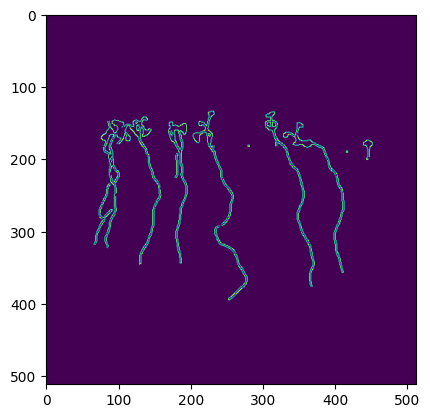

In [13]:
plt.imshow(can)

In [14]:
contours,hier = cv2.findContours(can,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
res = []
for i in contours:
    if len(i) > 30:
        res.append(i)

In [16]:
len(res)

22

In [17]:
# im = cv2.drawContours(mask,contours,-1,(0,255,0),1)

In [18]:
im2 = cv2.drawContours(np.zeros((512,512)),res,-1,(255,255,255),1)


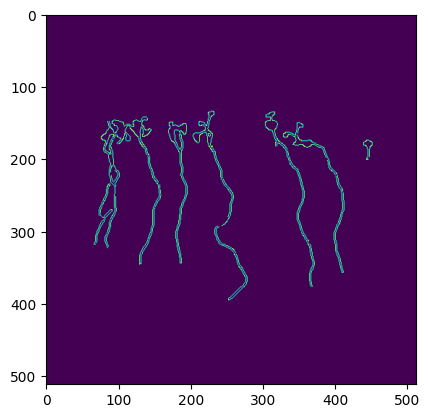

In [19]:
plt.imshow(im2)